### Задание: Прочитайте базу нефть-brent-2010-2019.csv. Сделать Resampling.

In [23]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Прочитаем базу нефть-brent-2010-2019.csv и сделаем перерасчет в представлении по месяцу

In [24]:
duq = pd.read_csv('нефть-brent-2010-2019.csv', parse_dates=['date'], index_col='date')
duq.head()

,value
date,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


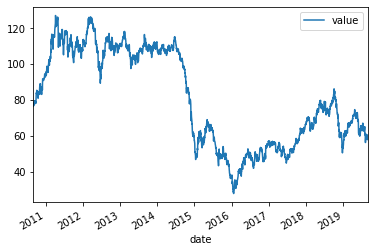

In [25]:
duq.plot()

По визуальным данным мы явно видим **Тренд и Сезонность**, знаит данные `нестационарны`.

Возьмем данные в определеннный год, когда цена начала падать: 2014

0 brent in January vs 0 brent in August.


Агрегируем временные ряды путем повторной выборки точек на более грубом временном уровне.

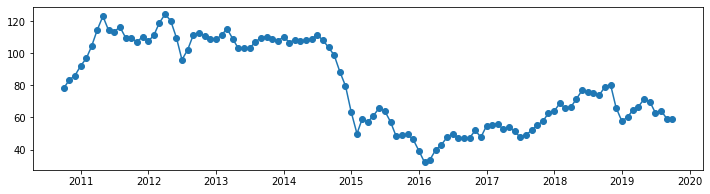

In [27]:
oil_monthly = duq.resample('M').mean()

plt.figure(figsize=(12, 3))
plt.plot(oil_monthly.value, "-o")

In [28]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['value'])[1])

 Критерий Дики-Фуллера: p=0.635186


### Преобразуем по дням

In [66]:
duq = pd.read_csv('нефть-brent-2010-2019.csv')
duq['date']=pd.to_datetime(duq['date'])
duq.head()

,date,value
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59


In [67]:
duq['date_time'] = duq["date"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq.head()

,date,value,date_time
date_time,,,
2019-09-01,2019-09-01,58.84,2019-09-01
2019-08-30,2019-08-30,59.19,2019-08-30
2019-08-29,2019-08-29,60.37,2019-08-29
2019-08-28,2019-08-28,59.84,2019-08-28
2019-08-27,2019-08-27,59.59,2019-08-27


In [68]:
duq = duq.resample('D', on = 'date_time').sum()
duq.head()

,value
date_time,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


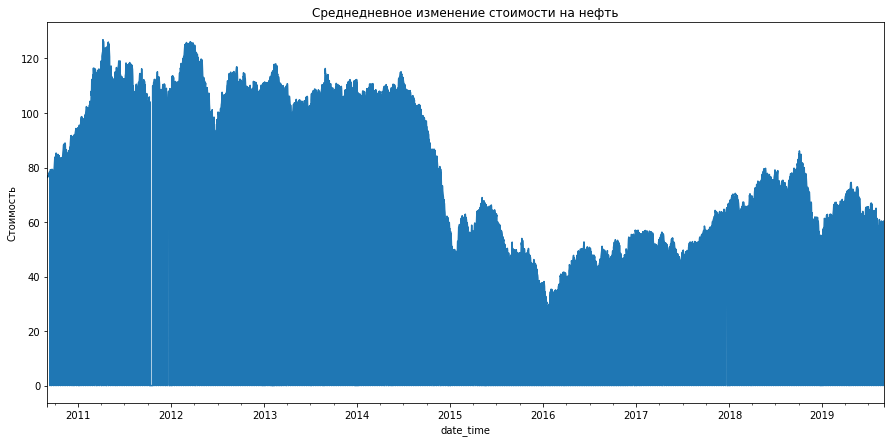

In [72]:
plt.figure(figsize(15,7))
duq['value'].plot()
plt.ylabel('sales')
plt.title('Cреднедневное изменение стоимости на нефть')
plt.ylabel ('Стоимость');
pylab.show()

In [35]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['value'])[1])

 Критерий Дики-Фуллера: p=0.355637


### По неделям

In [74]:
duq = pd.read_csv('нефть-brent-2010-2019.csv')
duq['date']=pd.to_datetime(duq['date'])
duq.head()

,date,value
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59


In [75]:
duq['date_time'] = duq["date"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq.head()

,date,value,date_time
date_time,,,
2019-09-01,2019-09-01,58.84,2019-09-01
2019-08-30,2019-08-30,59.19,2019-08-30
2019-08-29,2019-08-29,60.37,2019-08-29
2019-08-28,2019-08-28,59.84,2019-08-28
2019-08-27,2019-08-27,59.59,2019-08-27


In [76]:
duq = duq.resample('W', on = 'date_time').sum()
duq.head()

,value
date_time,
2010-09-05,383.08
2010-09-12,466.04
2010-09-19,472.16
2010-09-26,471.11
2010-10-03,487.27


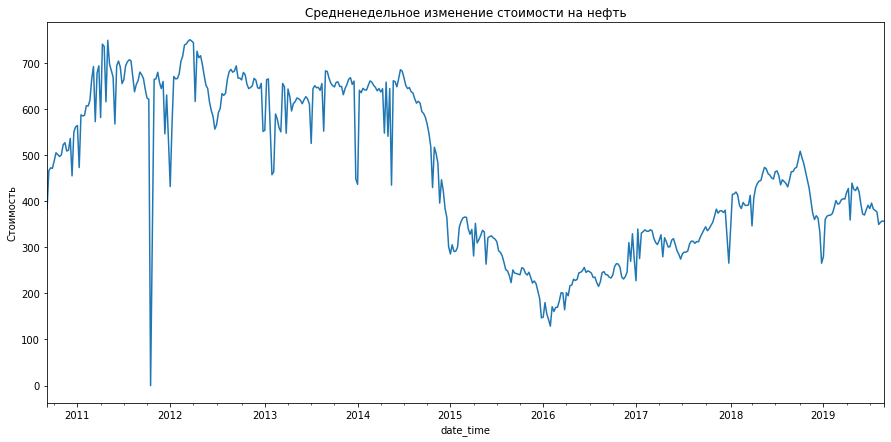

In [77]:
plt.figure(figsize(15,7))
duq['value'].plot()
plt.ylabel('sales')
plt.title('Cредненедельное изменение стоимости на нефть')
plt.ylabel ('Стоимость');
pylab.show()

In [78]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['value'])[1])

 Критерий Дики-Фуллера: p=0.480715


### По месяцам

In [79]:
duq = pd.read_csv('нефть-brent-2010-2019.csv')
duq['date']=pd.to_datetime(duq['date'])
duq.head()

,date,value
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59


In [80]:
duq['date_time'] = duq["date"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq.head()

,date,value,date_time
date_time,,,
2019-09-01,2019-09-01,58.84,2019-09-01
2019-08-30,2019-08-30,59.19,2019-08-30
2019-08-29,2019-08-29,60.37,2019-08-29
2019-08-28,2019-08-28,59.84,2019-08-28
2019-08-27,2019-08-27,59.59,2019-08-27


In [81]:
duq = duq.resample('M', on = 'date_time').sum()
duq.head()

,value
date_time,
2010-09-30,2112.16
2010-10-31,2170.31
2010-11-30,2240.63
2010-12-31,2398.04
2011-01-31,2425.83


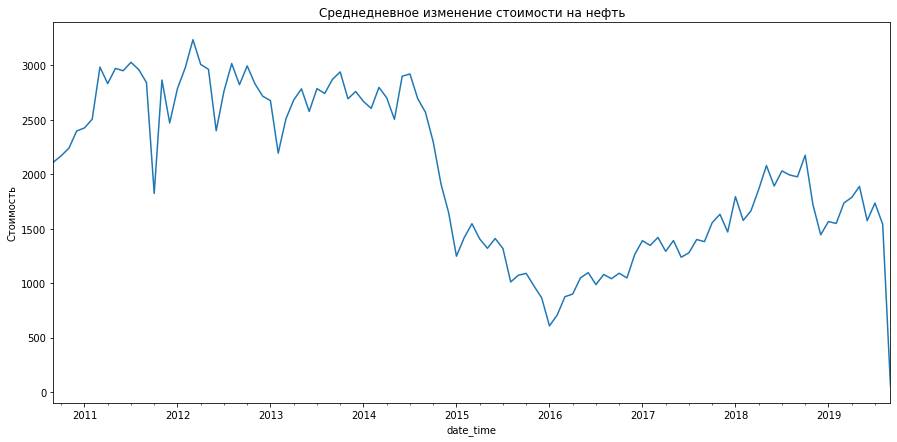

In [82]:
plt.figure(figsize(15,7))
duq['value'].plot()
plt.ylabel('sales')
plt.title('Cреднедневное изменение стоимости на нефть')
plt.ylabel ('Стоимость');
pylab.show()

In [83]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['value'])[1])

 Критерий Дики-Фуллера: p=0.697665


### Преобразуем по годам

In [84]:
duq = pd.read_csv('нефть-brent-2010-2019.csv')
duq['date']=pd.to_datetime(duq['date'])
duq.head()

,date,value
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59


In [85]:
duq['date_time'] = duq["date"].apply( lambda duq : 
datetime.datetime(year=duq.year, month=duq.month, day=duq.day))
duq.set_index(duq["date_time"],inplace=True)
duq.head()

,date,value,date_time
date_time,,,
2019-09-01,2019-09-01,58.84,2019-09-01
2019-08-30,2019-08-30,59.19,2019-08-30
2019-08-29,2019-08-29,60.37,2019-08-29
2019-08-28,2019-08-28,59.84,2019-08-28
2019-08-27,2019-08-27,59.59,2019-08-27


In [86]:
duq = duq.resample('Y', on = 'date_time').sum()
duq.head()

,value
date_time,
2010-12-31,8921.14
2011-12-31,32673.83
2012-12-31,34527.02
2013-12-31,32224.86
2014-12-31,30228.39


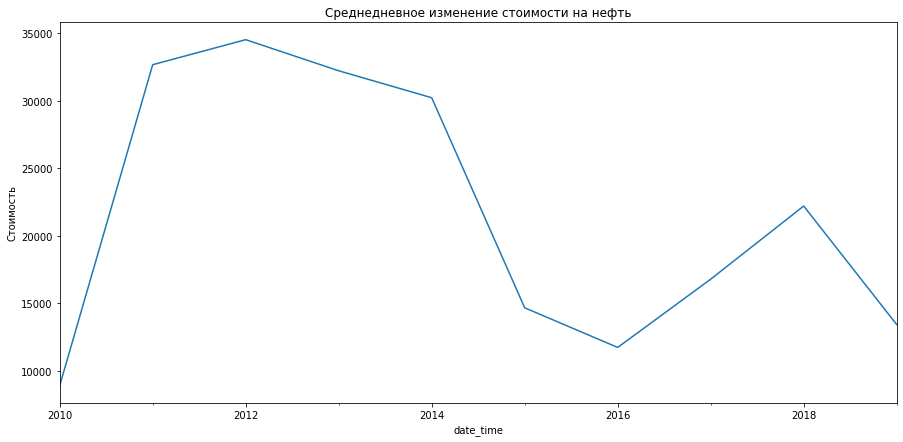

In [87]:
plt.figure(figsize(15,7))
duq['value'].plot()
plt.title('Cреднедневное изменение стоимости на нефть')
plt.ylabel ('Стоимость');
pylab.show()

In [88]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(duq['value'])[1])

 Критерий Дики-Фуллера: p=0.273069


**Вывод**:По критерию Дики-фуллера можно сделать вывод, что графики относительно `неделями` и `днями` больше походят на стационарные, критерий дики-фуллера также отвергает гипотезу о нестационарности.